In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("train.csv", index_col="PassengerId")
test_df = pd.read_csv("test.csv", index_col="PassengerId")

In [3]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Age', ylabel='Fare'>

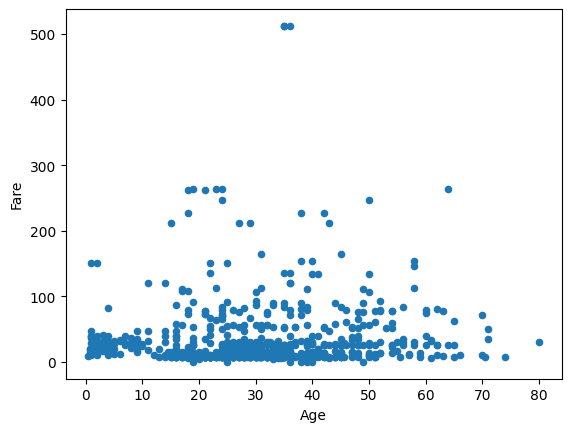

In [6]:
train_df.plot(kind="scatter", x="Age", y="Fare")

<Axes: >

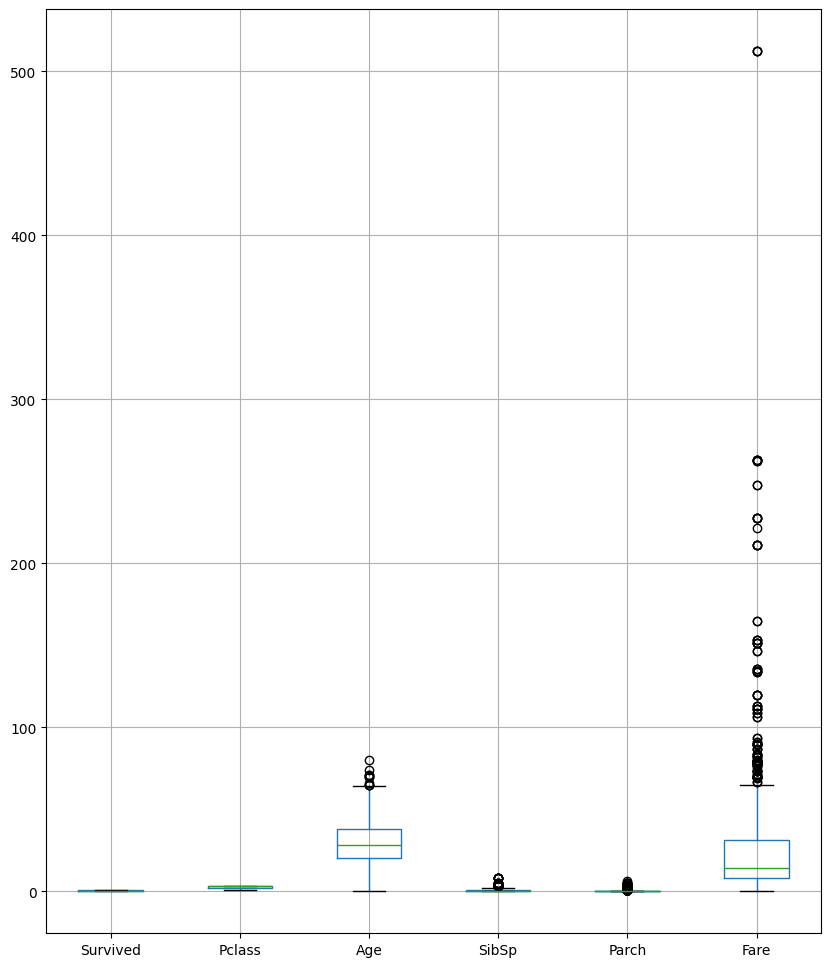

In [7]:
plt.figure(figsize=(10,12))
train_df.boxplot()

In [8]:
train_df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
x = train_df.drop(columns="Survived")
y = train_df["Survived"]

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
nan_cols = ["Age"]
nan_cols

['Age']

In [14]:
from sklearn.impute import SimpleImputer, KNNImputer
mean_si = SimpleImputer(strategy="mean")
mean_si.fit_transform(x_train[nan_cols])

array([[45.5       ],
       [23.        ],
       [32.        ],
       [26.        ],
       [ 6.        ],
       [24.        ],
       [45.        ],
       [29.        ],
       [29.49884615],
       [29.49884615],
       [42.        ],
       [36.        ],
       [33.        ],
       [17.        ],
       [29.        ],
       [50.        ],
       [35.        ],
       [38.        ],
       [34.        ],
       [17.        ],
       [11.        ],
       [61.        ],
       [30.        ],
       [ 7.        ],
       [63.        ],
       [20.        ],
       [29.49884615],
       [29.        ],
       [36.        ],
       [29.49884615],
       [50.        ],
       [27.        ],
       [30.        ],
       [33.        ],
       [29.49884615],
       [29.49884615],
       [ 2.        ],
       [25.        ],
       [51.        ],
       [25.        ],
       [29.49884615],
       [29.49884615],
       [24.        ],
       [18.        ],
       [29.49884615],
       [25

In [13]:
const_imputer = SimpleImputer(strategy="constant", fill_value=25)
const_imputer.fit_transform(x_train[nan_cols])

array([[45.5 ],
       [23.  ],
       [32.  ],
       [26.  ],
       [ 6.  ],
       [24.  ],
       [45.  ],
       [29.  ],
       [25.  ],
       [25.  ],
       [42.  ],
       [36.  ],
       [33.  ],
       [17.  ],
       [29.  ],
       [50.  ],
       [35.  ],
       [38.  ],
       [34.  ],
       [17.  ],
       [11.  ],
       [61.  ],
       [30.  ],
       [ 7.  ],
       [63.  ],
       [20.  ],
       [25.  ],
       [29.  ],
       [36.  ],
       [25.  ],
       [50.  ],
       [27.  ],
       [30.  ],
       [33.  ],
       [25.  ],
       [25.  ],
       [ 2.  ],
       [25.  ],
       [51.  ],
       [25.  ],
       [25.  ],
       [25.  ],
       [24.  ],
       [18.  ],
       [25.  ],
       [25.  ],
       [24.  ],
       [22.  ],
       [ 0.92],
       [24.  ],
       [26.  ],
       [34.  ],
       [21.  ],
       [25.  ],
       [25.  ],
       [25.  ],
       [22.  ],
       [62.  ],
       [18.  ],
       [42.  ],
       [57.  ],
       [19.  ],
       [

In [17]:
pd.DataFrame(mean_si.fit_transform(x_train[nan_cols]), index=x_train.index, columns=nan_cols)

,Age
PassengerId,
332,45.500000
734,23.000000
383,32.000000
705,26.000000
814,6.000000
...,...
107,21.000000
271,29.498846
861,41.000000


In [18]:
# Imputation with mean value 
mean_imputer = SimpleImputer(strategy="mean")

# Fitting & transforming mean to training dataset 
x_train[nan_cols] = pd.DataFrame(mean_imputer.fit_transform(x_train[nan_cols]), index=x_train.index, columns=nan_cols)

#Fitting & transforming mean to validation dataset
x_valid[nan_cols] = pd.DataFrame(mean_imputer.fit_transform(x_valid[nan_cols]), index=x_valid.index, columns=["Age"])

#Fitting & transforming mean to test dataset
test_df[nan_cols] = pd.DataFrame(mean_imputer.fit_transform(test_df[nan_cols]), index=test_df.index, columns=mean_imputer.feature_names_in_)

In [19]:
x_train[nan_cols]

,Age
PassengerId,
332,45.500000
734,23.000000
383,32.000000
705,26.000000
814,6.000000
...,...
107,21.000000
271,29.498846
861,41.000000


In [20]:
cat_cols = x_train.select_dtypes(include="object").columns
cat_cols

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [22]:
x_train["Sex"].value_counts()

Sex
male      467
female    245
Name: count, dtype: int64

In [25]:
x_train["Embarked"].value_counts()

Embarked
S    525
C    125
Q     60
Name: count, dtype: int64

In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [27]:
threshold = 5

In [28]:
oh_cols = [i for i in cat_cols if len(x_train[i].unique()) <= threshold]
oh_cols

['Sex', 'Embarked']

In [30]:
ord_cols = [i for i in cat_cols if len(x_train[i].unique()) > threshold]
ord_cols

['Name', 'Ticket', 'Cabin']

In [31]:
oe = OrdinalEncoder()
oe.fit_transform(x_train[ord_cols])

array([[499.,  15.,  45.],
       [ 63., 188.,  nan],
       [642., 543.,  nan],
       ...,
       [249., 333.,  nan],
       [108.,  27.,  37.],
       [684., 348.,  80.]], shape=(712, 3))

In [35]:
oe = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
x_train[ord_cols]=pd.DataFrame(oe.fit_transform(x_train[ord_cols]), index=x_train.index, columns=ord_cols)

x_valid[ord_cols]=pd.DataFrame(oe.fit_transform(x_valid[ord_cols]), index=x_valid.index, columns=ord_cols)

test_df[ord_cols]=pd.DataFrame(oe.fit_transform(test_df[ord_cols]), index=test_df.index, columns=ord_cols)

In [36]:
x_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
332,1,499.0,male,45.5,0,0,15.0,28.5000,45.0,S
734,2,63.0,male,23.0,0,0,188.0,13.0000,NaN,S
383,3,642.0,male,32.0,0,0,543.0,7.9250,NaN,S
705,3,250.0,male,26.0,1,0,332.0,7.8542,NaN,S
814,3,19.0,female,6.0,4,2,277.0,31.2750,NaN,S


In [37]:
x_train[oh_cols]

,Sex,Embarked
PassengerId,,
332,male,S
734,male,S
383,male,S
705,male,S
814,female,S
...,...,...
107,female,S
271,male,S
861,male,S


In [45]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

x_train_oh=pd.DataFrame(ohe.fit_transform(x_train[oh_cols]), index=x_train.index, columns=ohe.get_feature_names_out())

x_valid_oh=pd.DataFrame(ohe.fit_transform(x_valid[oh_cols]), index=x_valid.index, columns=ohe.get_feature_names_out())

test_oh=pd.DataFrame(ohe.fit_transform(test_df[oh_cols]), index=test_df.index, columns=ohe.get_feature_names_out())

In [40]:
ohe.get_feature_names_out()

array(['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Embarked_nan'], dtype=object)

In [46]:
oh_cols

['Sex', 'Embarked']

In [47]:
x_train = x_train.join(x_train_oh).drop(columns=oh_cols)
x_valid = x_valid.join(x_valid_oh).drop(columns=oh_cols)
test_df = test_df.join(test_oh).drop(columns=oh_cols)

In [48]:
x_train.head()

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
PassengerId,,,,,,,,,,,,,,
332,1,499.0,45.5,0,0,15.0,28.5000,45.0,0.0,1.0,0.0,0.0,1.0,0.0
734,2,63.0,23.0,0,0,188.0,13.0000,NaN,0.0,1.0,0.0,0.0,1.0,0.0
383,3,642.0,32.0,0,0,543.0,7.9250,NaN,0.0,1.0,0.0,0.0,1.0,0.0
705,3,250.0,26.0,1,0,332.0,7.8542,NaN,0.0,1.0,0.0,0.0,1.0,0.0
814,3,19.0,6.0,4,2,277.0,31.2750,NaN,1.0,0.0,0.0,0.0,1.0,0.0


In [49]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 332 to 103
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        712 non-null    int64  
 1   Name          712 non-null    float64
 2   Age           712 non-null    float64
 3   SibSp         712 non-null    int64  
 4   Parch         712 non-null    int64  
 5   Ticket        712 non-null    float64
 6   Fare          712 non-null    float64
 7   Cabin         159 non-null    float64
 8   Sex_female    712 non-null    float64
 9   Sex_male      712 non-null    float64
 10  Embarked_C    712 non-null    float64
 11  Embarked_Q    712 non-null    float64
 12  Embarked_S    712 non-null    float64
 13  Embarked_nan  712 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 99.6 KB


In [50]:
x_train.isnull().sum()

Pclass            0
Name              0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           553
Sex_female        0
Sex_male          0
Embarked_C        0
Embarked_Q        0
Embarked_S        0
Embarked_nan      0
dtype: int64

In [51]:
x_valid.isnull().sum()

Pclass          0
Name            0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin         134
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [52]:
test_df.isnull().sum()

Pclass          0
Name            0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin         327
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [54]:
nan_count = x_train.isnull().sum()

In [55]:
nan_count[nan_count > 0]

Cabin    553
dtype: int64

In [56]:
nan_col = nan_count[nan_count > 0].index
nan_col

Index(['Cabin'], dtype='object')

In [70]:
mode_imputer = SimpleImputer(strategy="most_frequent")
x_train = pd.DataFrame(mode_imputer.fit_transform(x_train), index=x_train.index, columns=x_train.columns)

x_valid = pd.DataFrame(mode_imputer.fit_transform(x_valid), index=x_valid.index, columns=x_valid.columns)

test_df = pd.DataFrame(mode_imputer.fit_transform(test_df), index=test_df.index, columns=test_df.columns)

In [71]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 332 to 103
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        712 non-null    float64
 1   Name          712 non-null    float64
 2   Age           712 non-null    float64
 3   SibSp         712 non-null    float64
 4   Parch         712 non-null    float64
 5   Ticket        712 non-null    float64
 6   Fare          712 non-null    float64
 7   Cabin         712 non-null    float64
 8   Sex_female    712 non-null    float64
 9   Sex_male      712 non-null    float64
 10  Embarked_C    712 non-null    float64
 11  Embarked_Q    712 non-null    float64
 12  Embarked_S    712 non-null    float64
 13  Embarked_nan  712 non-null    float64
dtypes: float64(14)
memory usage: 99.6 KB


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [73]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

/home/anjali/Desktop/MLP Course/menv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [74]:
tr = DecisionTreeClassifier()
tr.fit(x_train, y_train)

DecisionTreeClassifier()

In [75]:
y_lr_valid = lr.predict(x_valid)
y_tr_valid = tr.predict(x_valid)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Embarked_nan
